$$ \partial^2_t u = \nabla u$$

$$\nabla_h u^n_{i,j} = \frac{u_{i+1,j}+u_{i-1,j} - 2u_{i,j}}{\Delta x^2}+\frac{u_{i,j+1}+u_{i,j-1} - 2u_{i,j}}{\Delta y^2}$$

$$\frac{u^{n+1}_{i,j}-2u^n_{i,j}+u^{n-1}_{i,j}}{\Delta t ^2} = \nabla_h u^n_{i,j}$$

$$u_{i,j}^{n+1} = 2u_{i,j}^n - u_{i,j}^{n-1} + \Delta t ^2 \nabla_h u_{i,j}^n$$

Condicion inicial $u_0(x,y)= \phi(x,y)$ y $v_0(x,y)=\psi(x,y)$

Por $v=\partial_t u$ entonces 

$$u_{i,j}^1-u_{i,j}^{-1} = 2\Delta t \psi_{i,j}$$

y por el esquema

$$u_{i,j}^{1} + u_{i,j}^{-1}= 2\phi_{i,j}  + \Delta t ^2 \nabla_h \phi_{i,j}$$

Osea que

$$u_{i,j}^1 = \Delta t \psi_{i,j} + \phi_{i,j} + \frac{\Delta t^2}{2} \nabla_h\phi_{i,j}$$

Y si $\psi = 0$

$$u_{i,j}^1 = \phi_{i,j} + \frac{\Delta t^2}{2} \nabla_h\phi_{i,j}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(-1,1,150)
y = 1.*x
x,y = np.meshgrid(x,y)
nt = 10000
u = np.zeros((nt,x.shape[0],x.shape[1]))

In [4]:
h = np.diff(x)[0,0]
cfl = 0.125
dt = cfl*h

### Boundary condition

In [5]:
u[0,0,:] = 0.
u[0,-1,:] = 0.
u[0,:,0] = 0.
u[0,:,-1] = 0.

### Initial condition

<matplotlib.colorbar.Colorbar instance at 0x7f03f2626170>

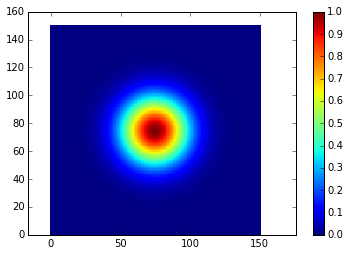

In [6]:
u[0,1:-1,1:-1] = np.exp(-(x[1:-1,1:-1]**2+y[1:-1,1:-1]**2)/0.1)
plt.pcolormesh(u[0,:,:])
plt.axis('equal')
plt.colorbar()

$$u_{i,j}^1 = \phi_{i,j} + \frac{\Delta t^2}{2} \nabla_h\phi_{i,j}$$

In [7]:
u[1,1:-1,1:-1] = u[0,1:-1,1:-1] + dt*dt/h**2*(u[0,2:,1:-1]+u[0,:-2,1:-1]+u[0,1:-1,2:]+u[0,1:-1,:-2]-4*u[0,1:-1,1:-1])

<matplotlib.colorbar.Colorbar instance at 0x7f03f23b4c68>

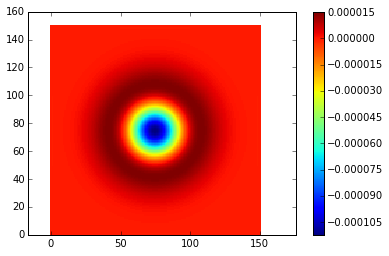

In [8]:
plt.pcolormesh(u[1,:,:] - u[0,:,:])
plt.axis('equal')
plt.colorbar()

$$u_{i,j}^{n+1} = 2u_{i,j}^n - u_{i,j}^{n-1} + \Delta t ^2 \nabla_h u_{i,j}^n$$

In [49]:
for n in range(1,nt-1):
    u[n,0,:] = 0.
    u[n,-1,:] = 0.
    u[n,:,0] = 0.
    u[n,:,-1] = 0.
    u[n+1,1:-1,1:-1] = 2.0*u[n,1:-1,1:-1] - u[n-1,1:-1,1:-1] + \
            dt*dt/h**2*(u[n,2:,1:-1]+u[n,:-2,1:-1]+\
                        u[n,1:-1,2:]+u[n,1:-1,:-2]-4*u[n,1:-1,1:-1])

<matplotlib.colorbar.Colorbar instance at 0x7f186dbaa950>

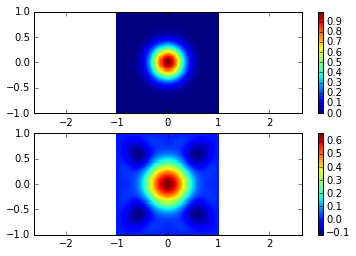

In [52]:
plt.subplot(211)
plt.pcolormesh(x,y,u[1,:,:])
plt.axis('equal')
plt.colorbar()
plt.subplot(212)
plt.pcolormesh(x,y,u[-1,:,:])
plt.axis('equal')
plt.colorbar()


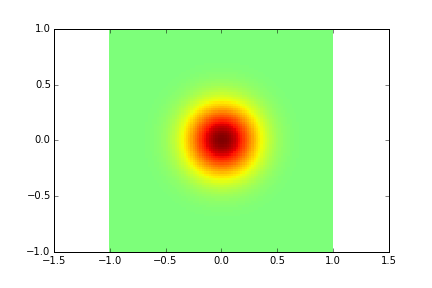
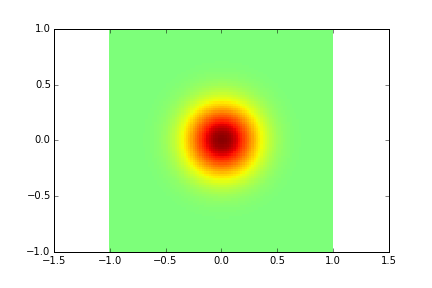
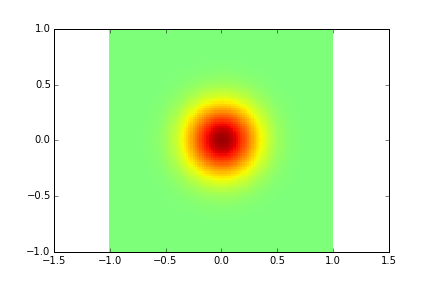
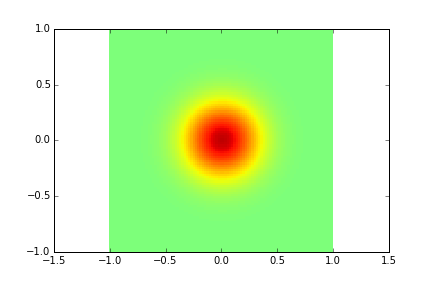
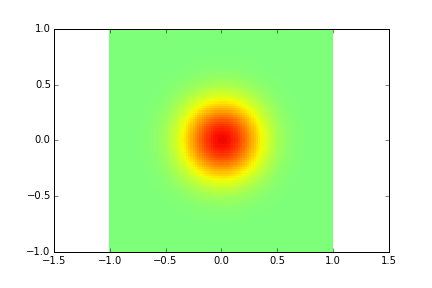
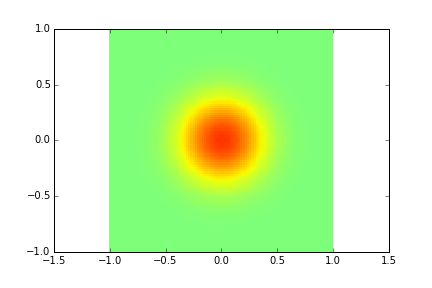
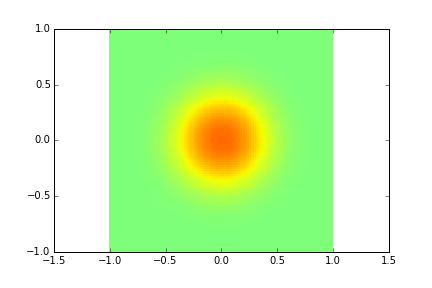
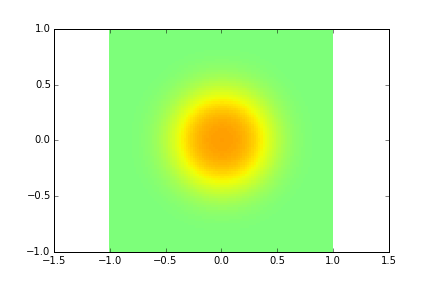
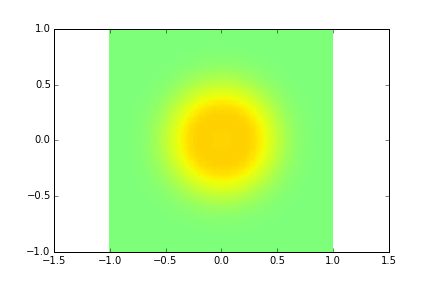
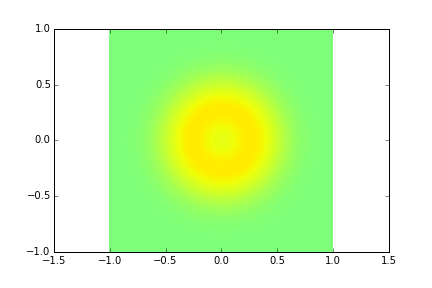
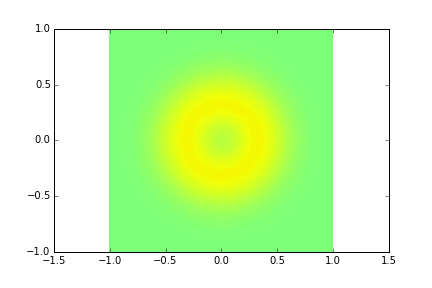
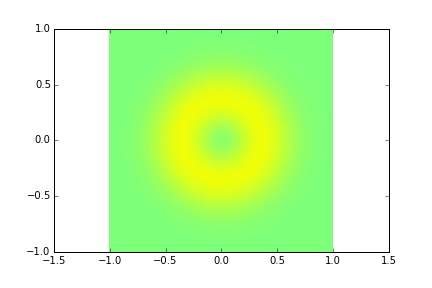
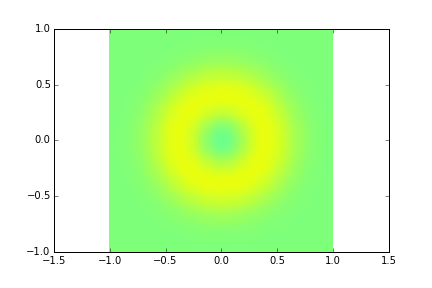
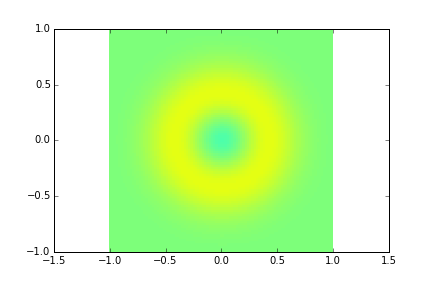
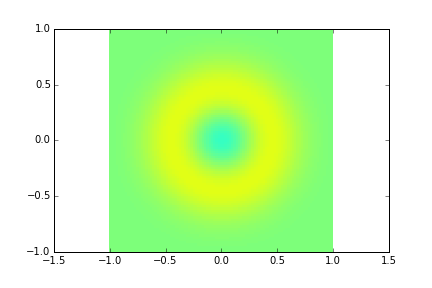
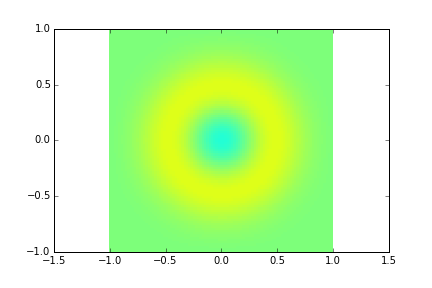
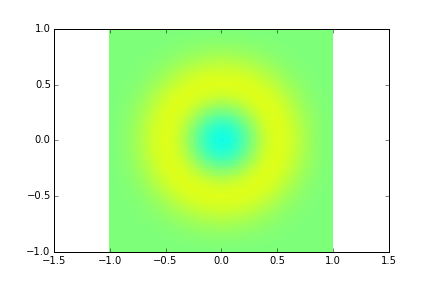
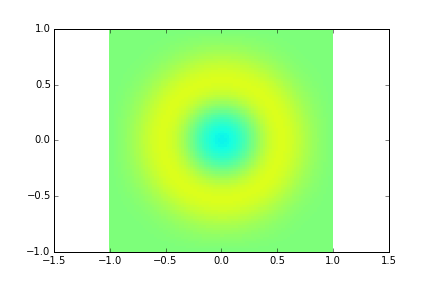
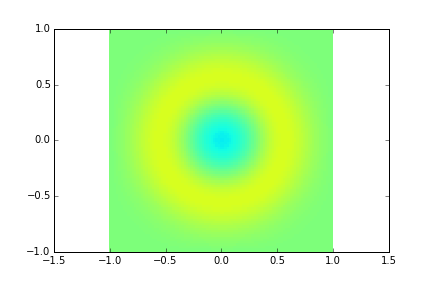
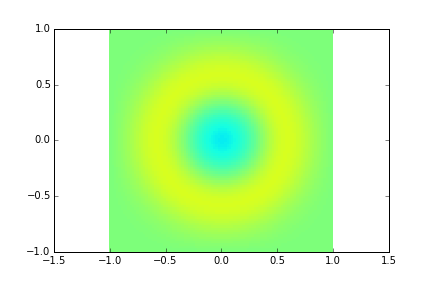
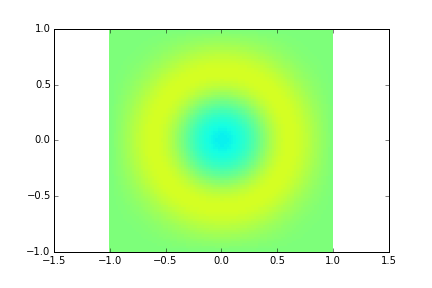
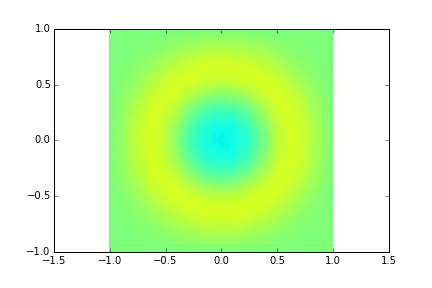
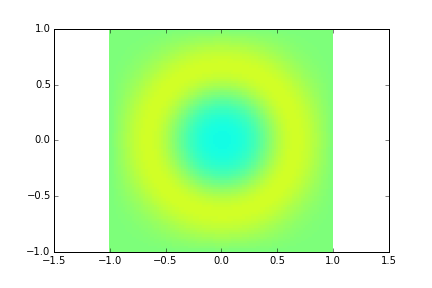
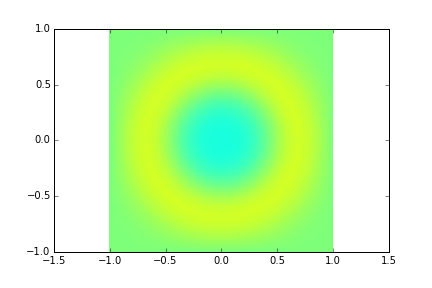
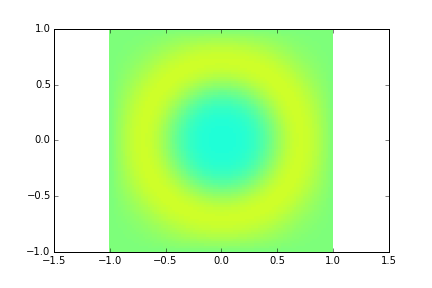
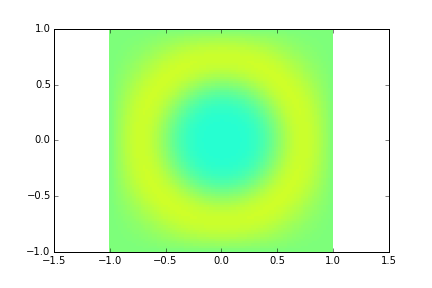
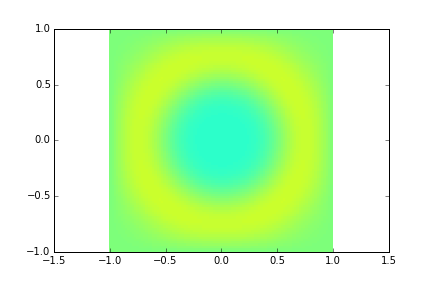
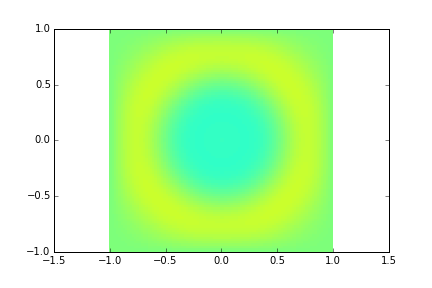
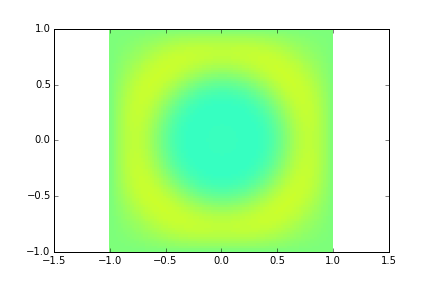
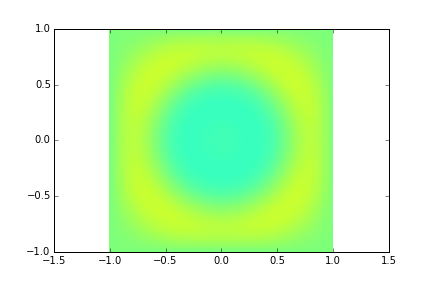
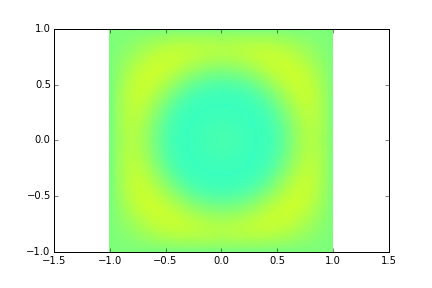
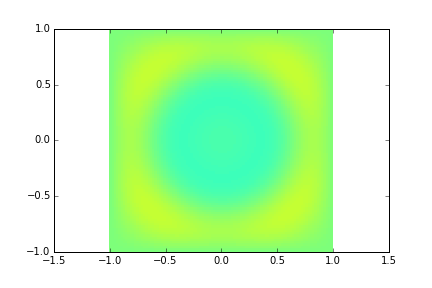
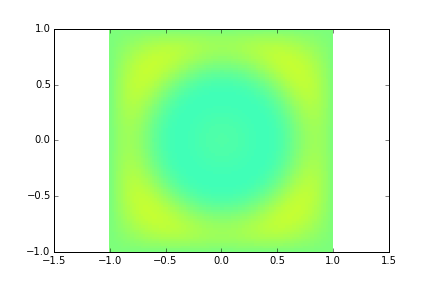
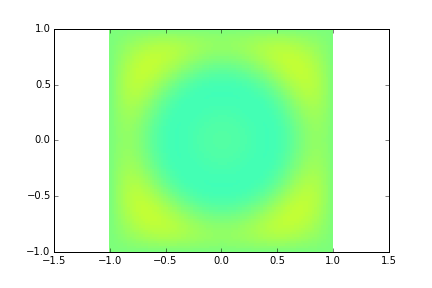
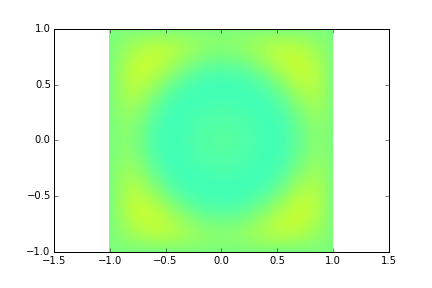
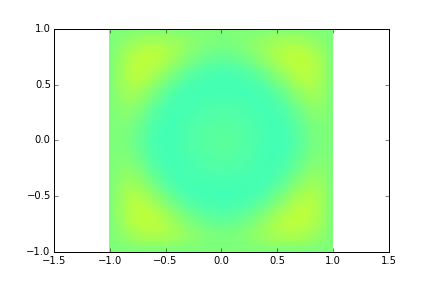
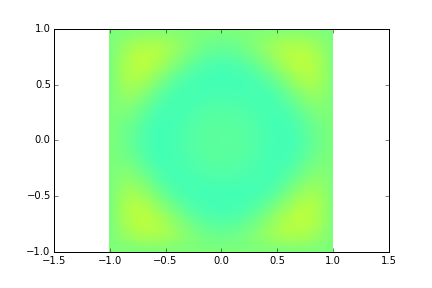
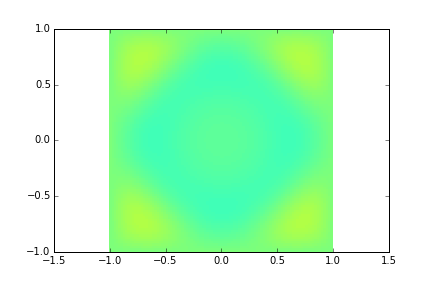
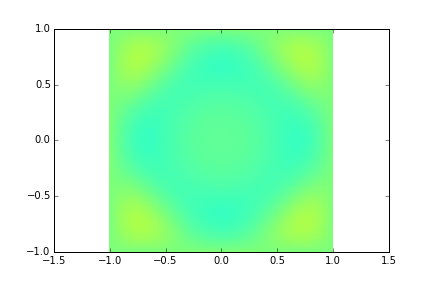
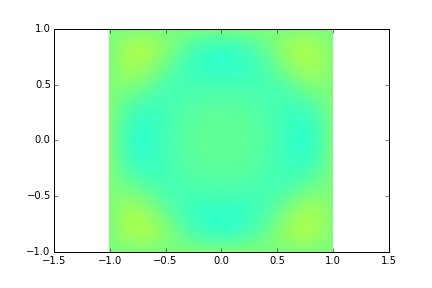
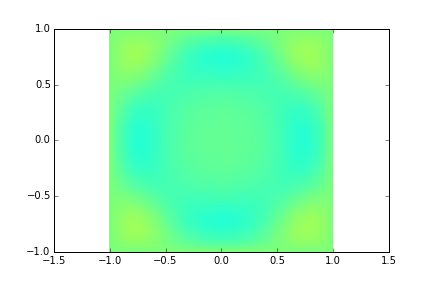
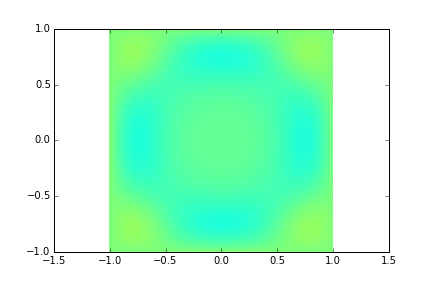
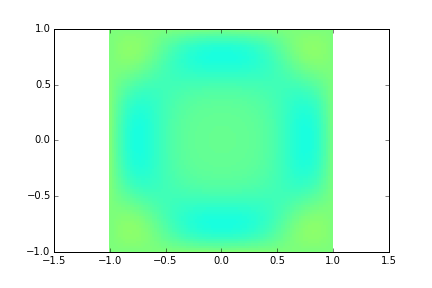
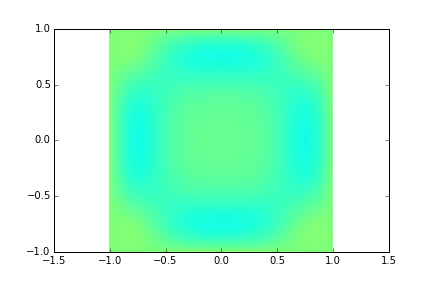
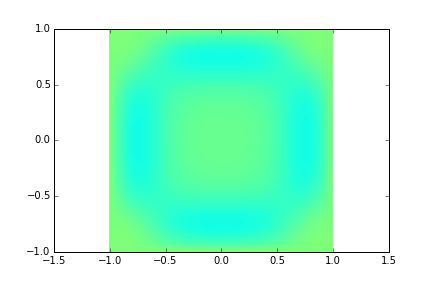
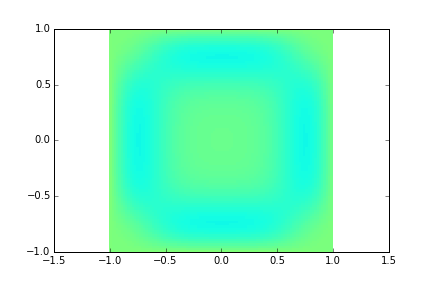
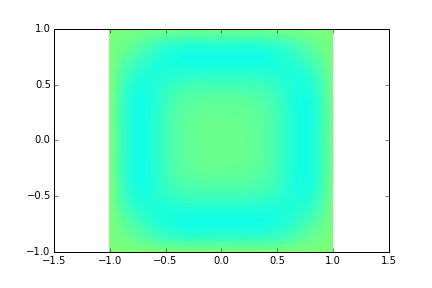
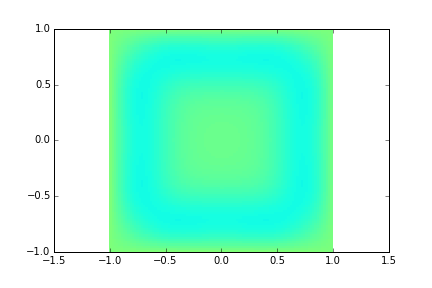
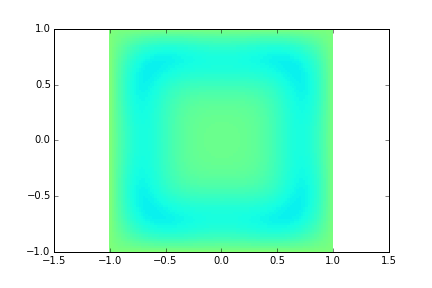
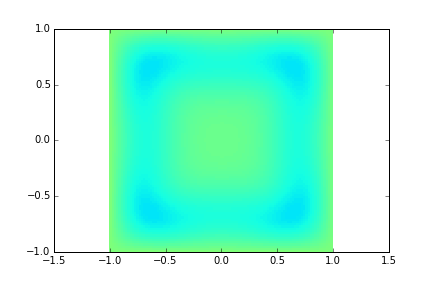
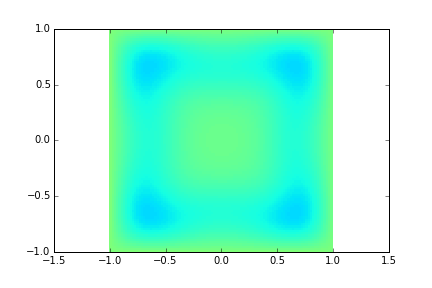
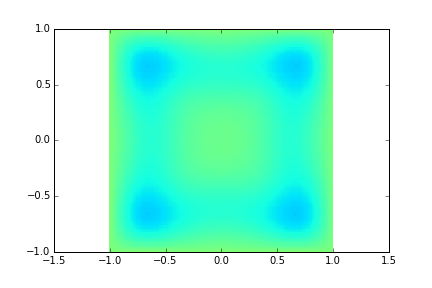
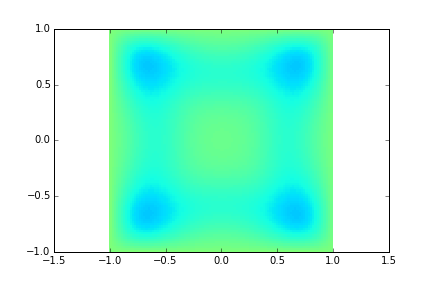
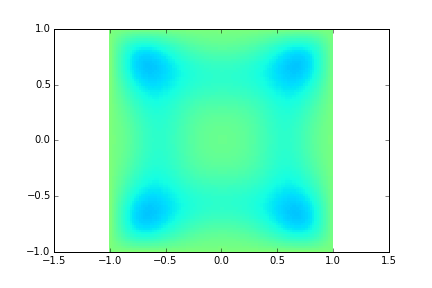
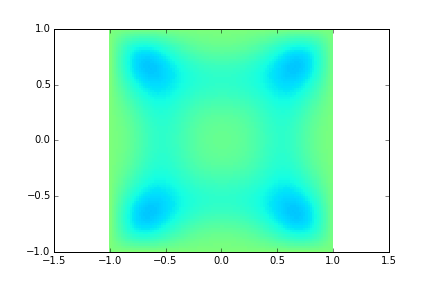
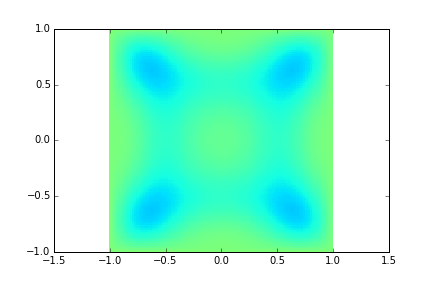
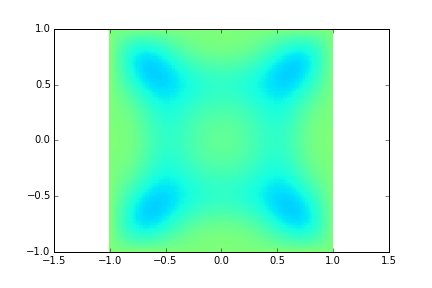
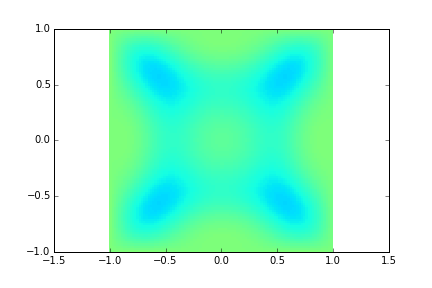
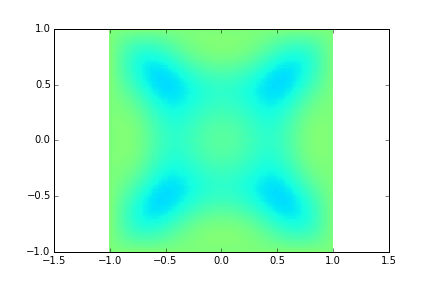
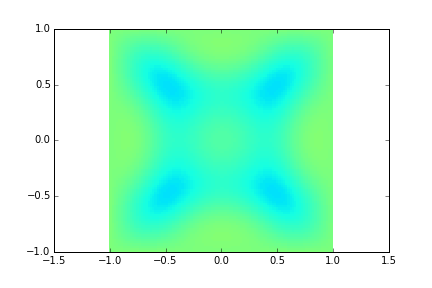
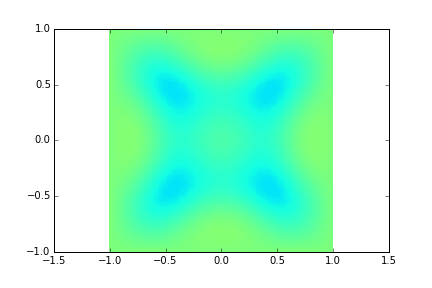
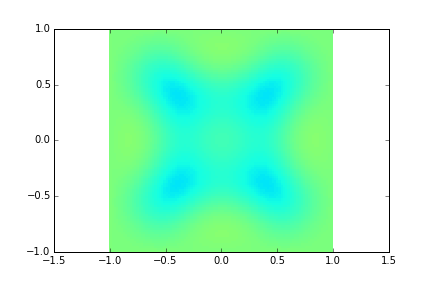
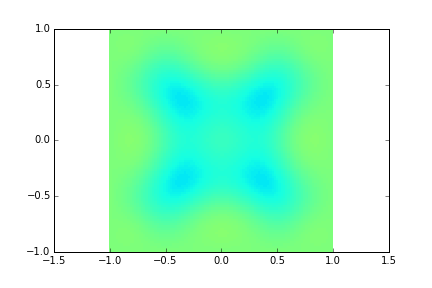
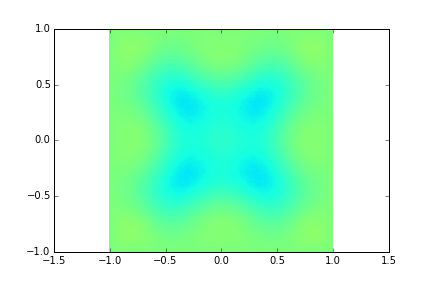
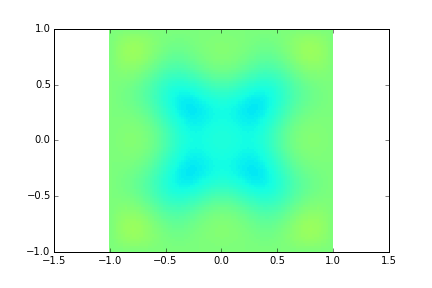
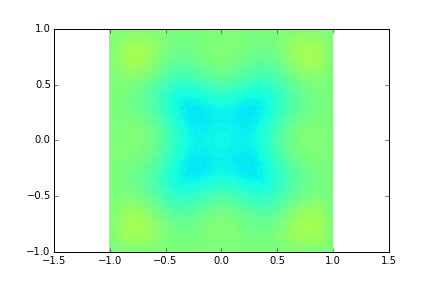
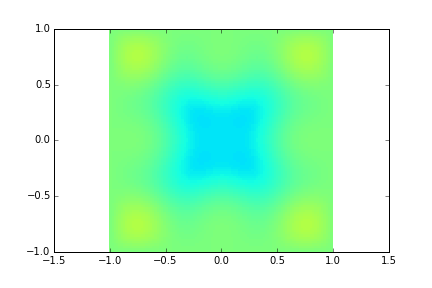
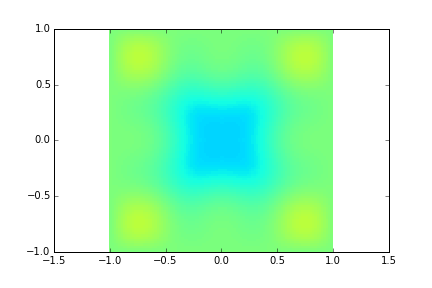
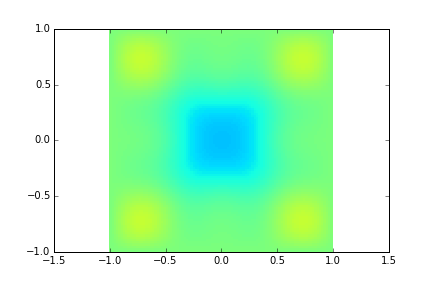
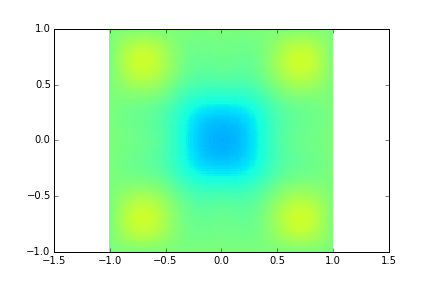
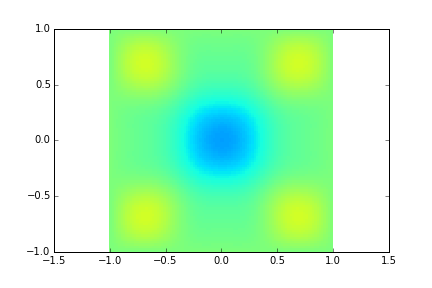
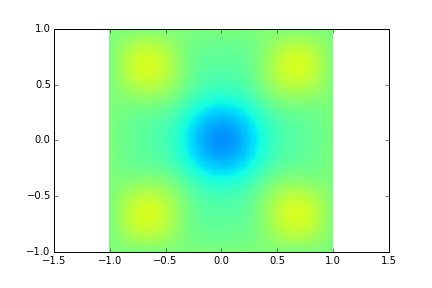
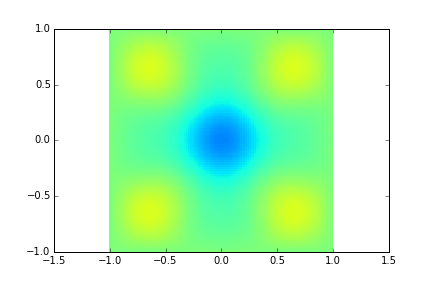
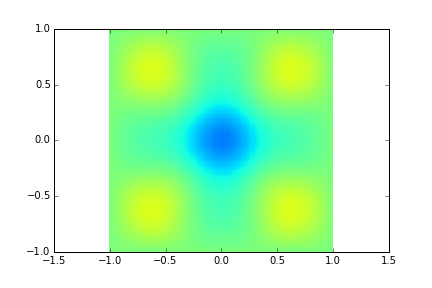
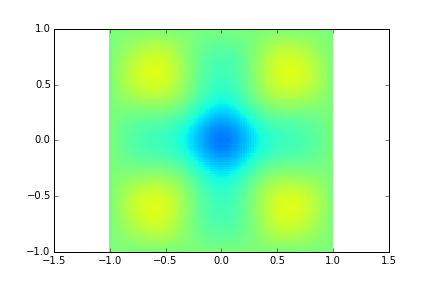
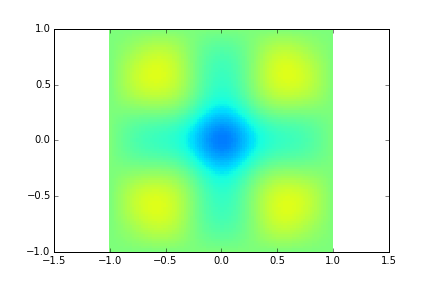
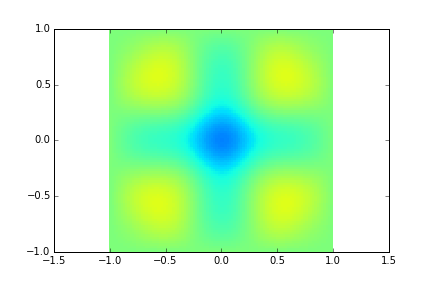
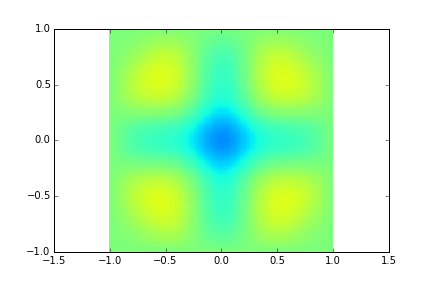
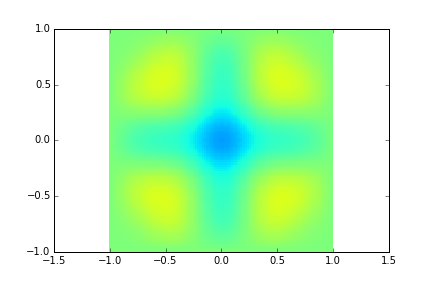
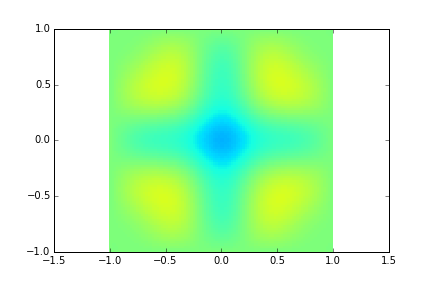
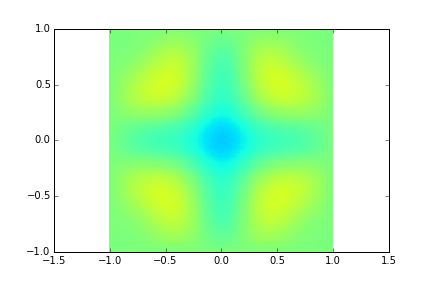
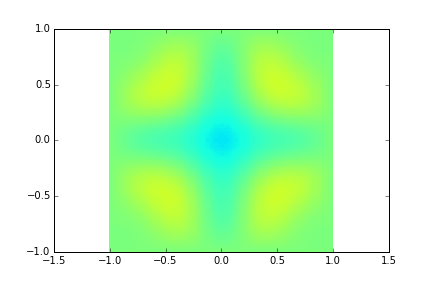
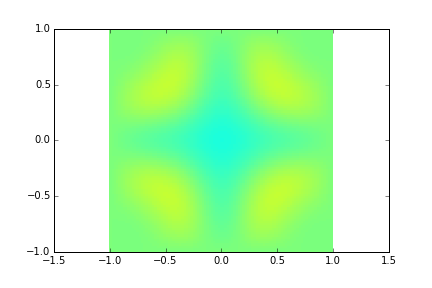
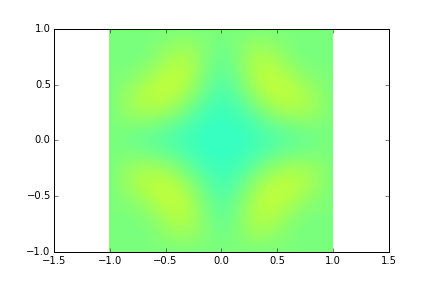
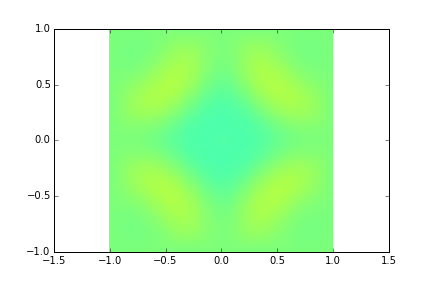
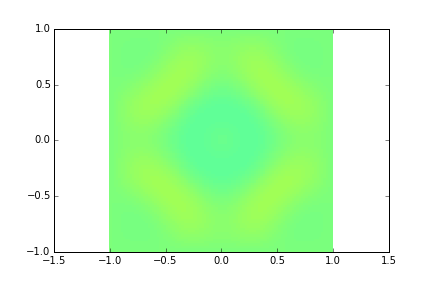
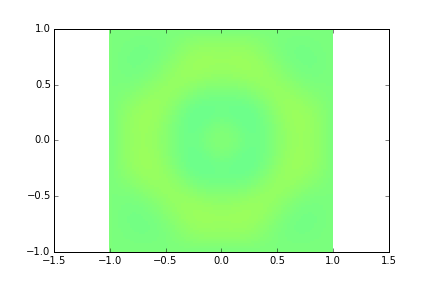
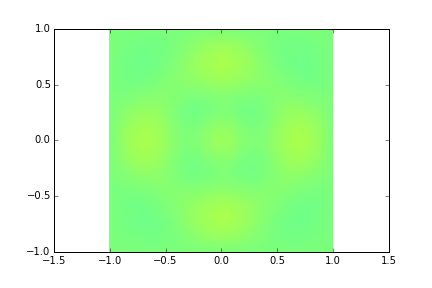
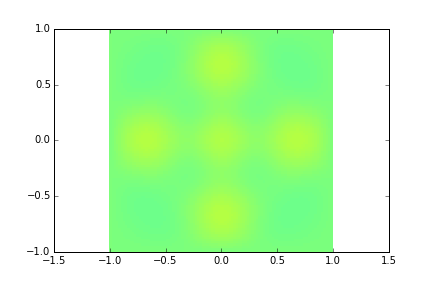
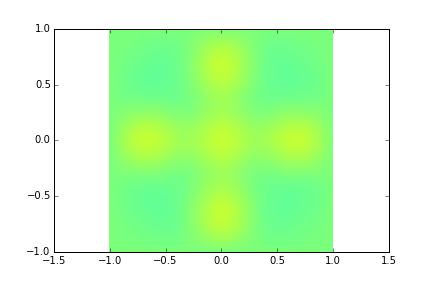
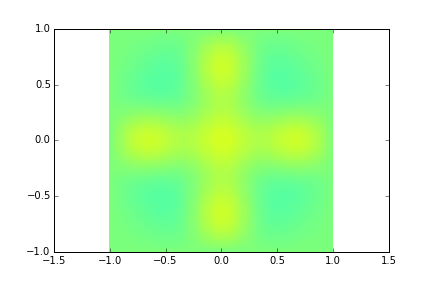
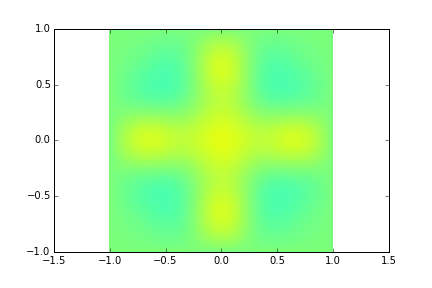
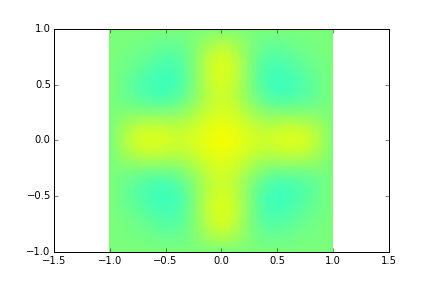
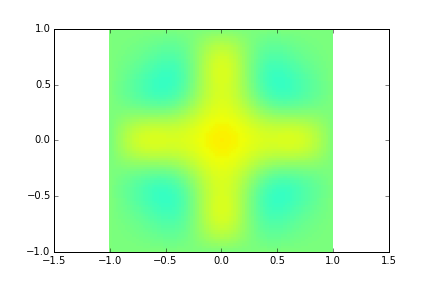
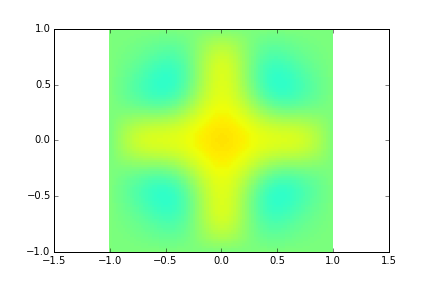
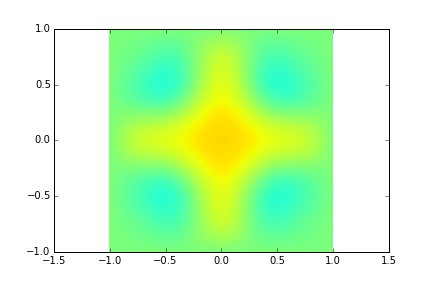
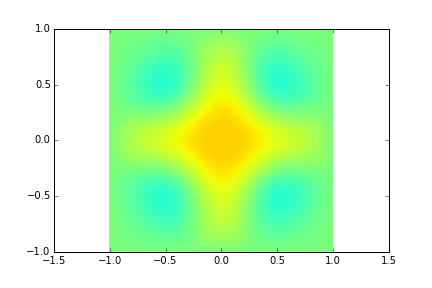
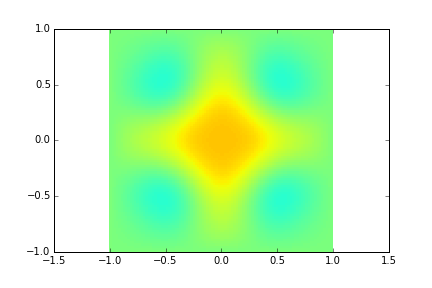
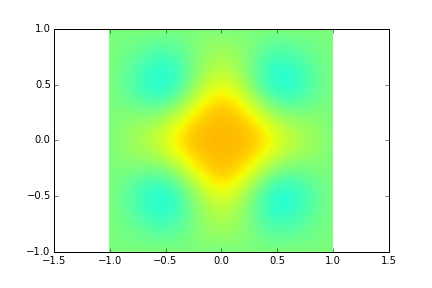
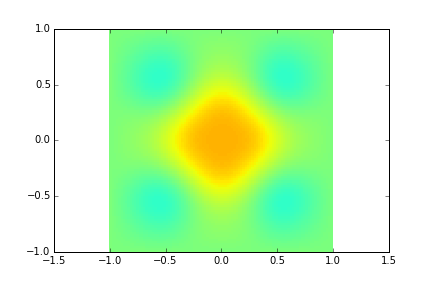

In [58]:
from matplotlib import animation
from JSAnimation import IPython_display


fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(-1,1))
pc = ax.pcolormesh(x,y,u[0,:,:],vmin=-1., vmax = 1.)
plt.axis('equal')

def animate(i):
    pc.set_array(u[i*10,:-1,:-1].ravel())
    return pc

animation.FuncAnimation(fig, animate, frames=100, interval=30)

## con fuerza externa

In [9]:
x = np.linspace(-1,1,150)
y = 1.*x
x,y = np.meshgrid(x,y)
nt = 10000
u = np.zeros((nt,x.shape[0],x.shape[1]))

In [59]:
for n in range(1,nt-1):
    u[n,0,:] = 0.
    u[n,-1,:] = 0.
    u[n,:,0] = 0.
    u[n,:,-1] = 0.
    u[n+1,1:-1,1:-1] = 2.0*u[n,1:-1,1:-1] - u[n-1,1:-1,1:-1] + \
            dt*dt/h**2*(u[n,2:,1:-1]+u[n,:-2,1:-1]+\
                        u[n,1:-1,2:]+u[n,1:-1,:-2]-4*u[n,1:-1,1:-1])
    if n <50:
        u[n+1,1:-1,1:-1] = np.where((x[1:-1,1:-1]**2+y[1:-1,1:-1]**2)<0.2**2, u[n+1,1:-1,1:-1]+0.001,u[n+1,1:-1,1:-1])

In [60]:
dt*dt

2.8151885050222883e-06

<matplotlib.colorbar.Colorbar instance at 0x7f037e8fd9e0>

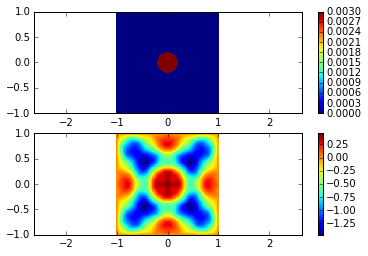

In [61]:
plt.subplot(211)
plt.pcolormesh(x,y,u[3,:,:])
plt.axis('equal')
plt.colorbar()
plt.subplot(212)
plt.pcolormesh(x,y,u[-1,:,:])
plt.axis('equal')
plt.colorbar()


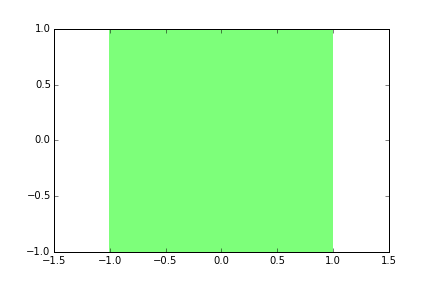
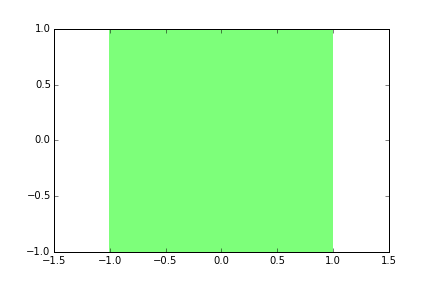
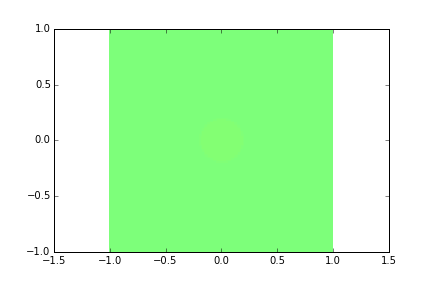
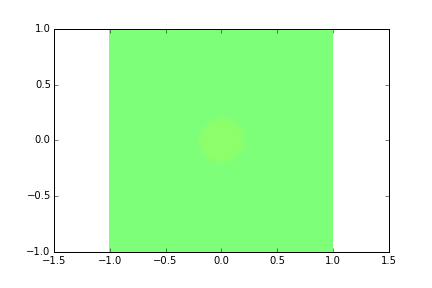
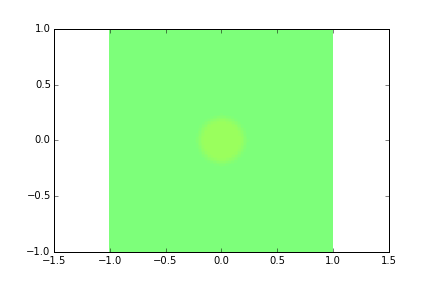
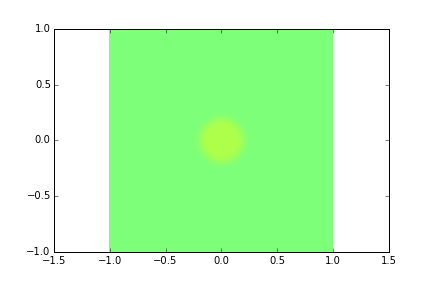
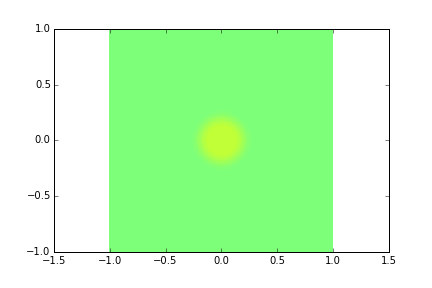
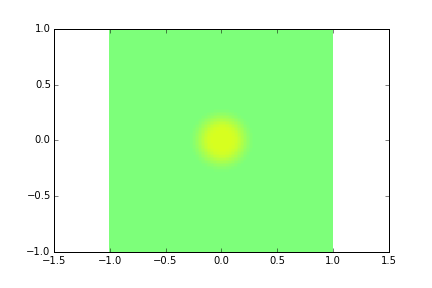
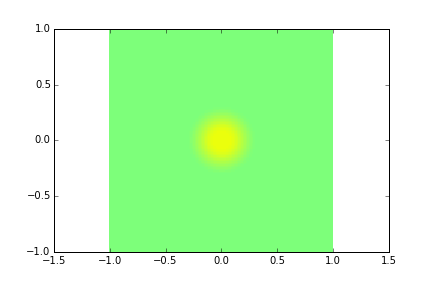
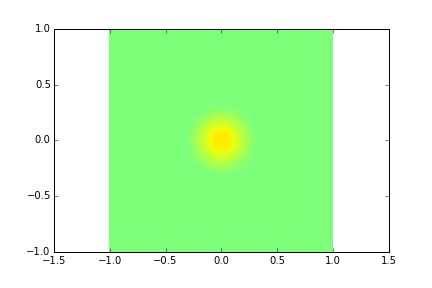
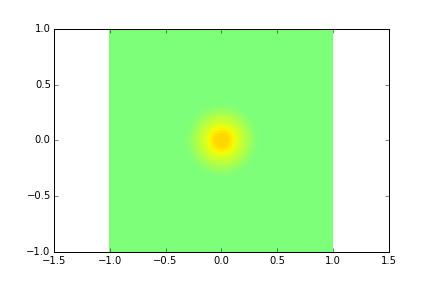
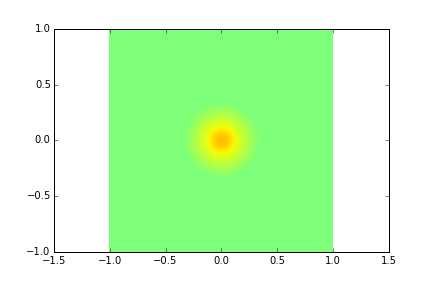
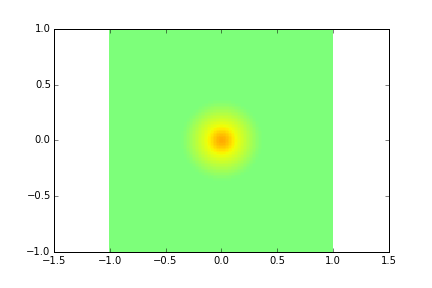
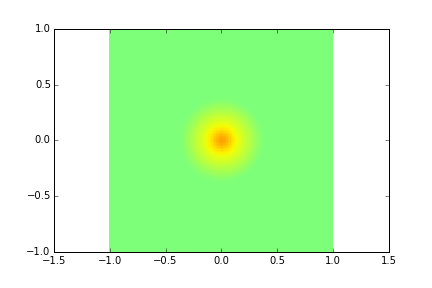
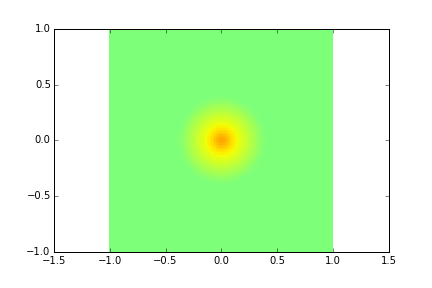
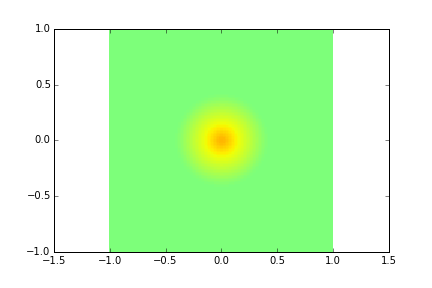
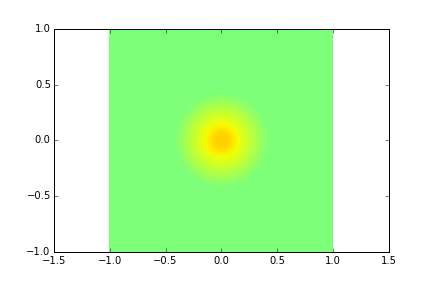
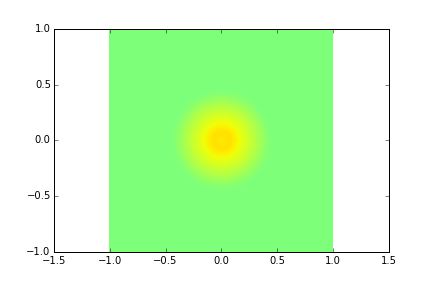
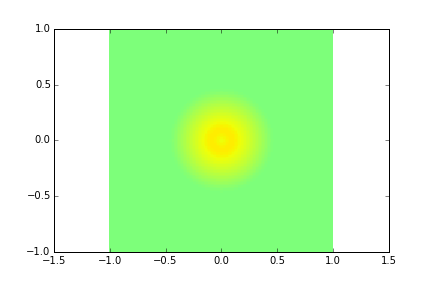
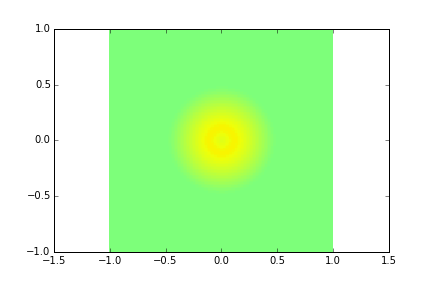
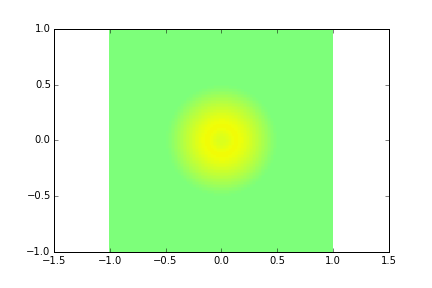
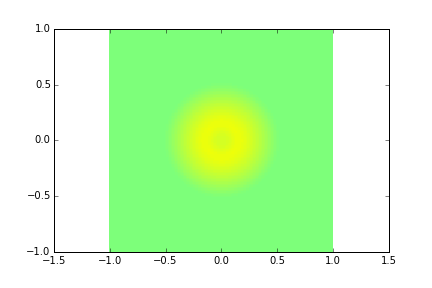
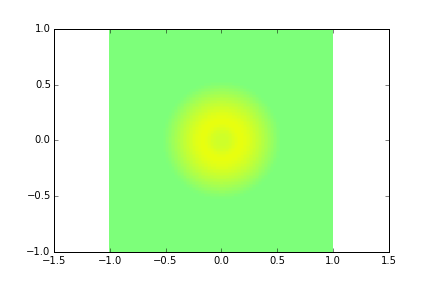
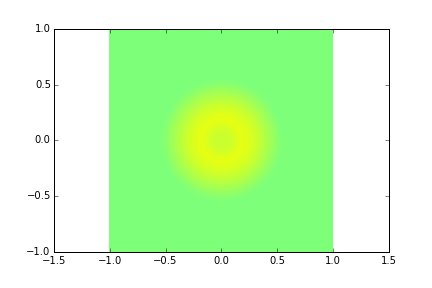
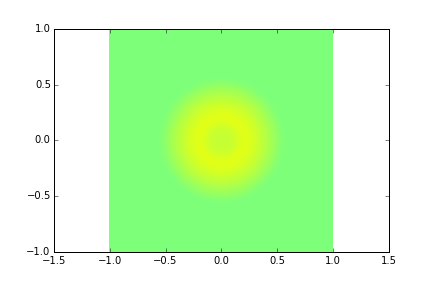
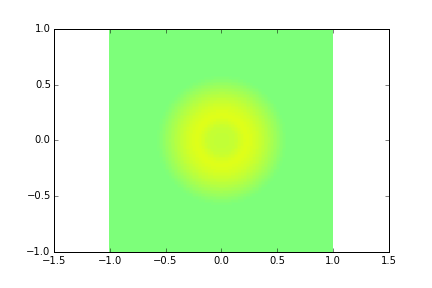
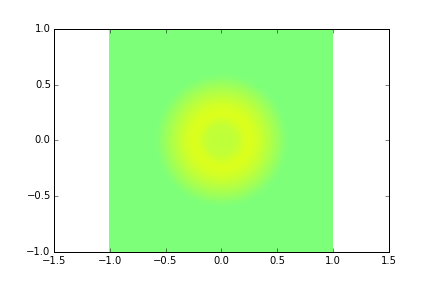
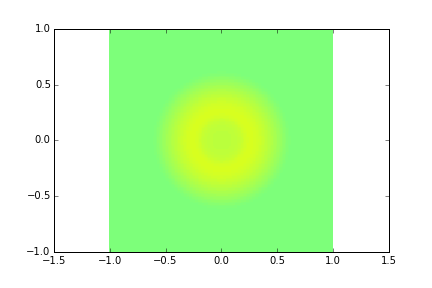
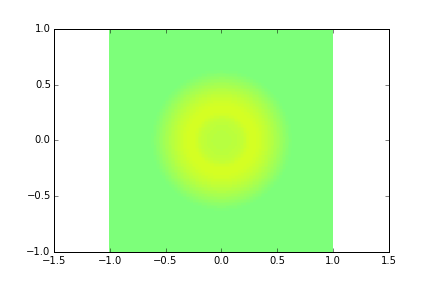
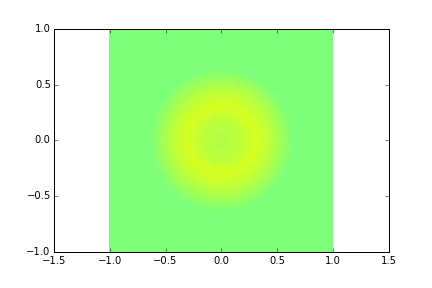
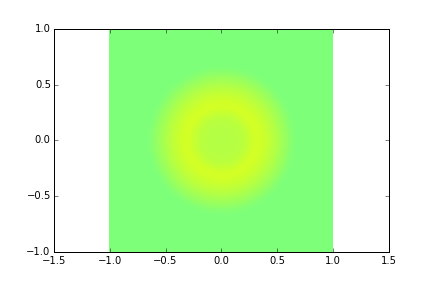
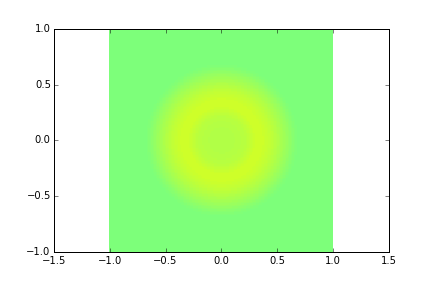
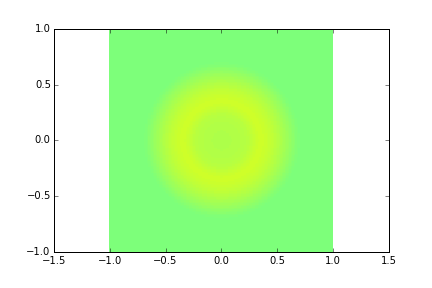
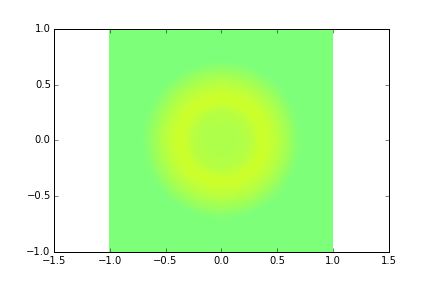
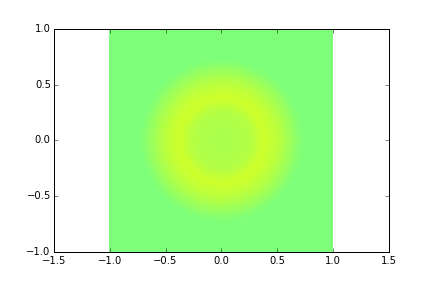
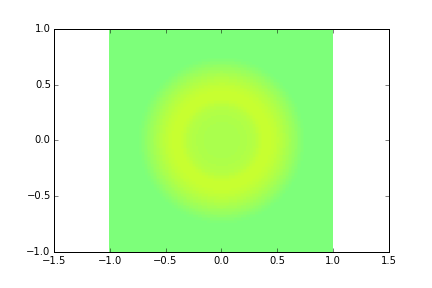
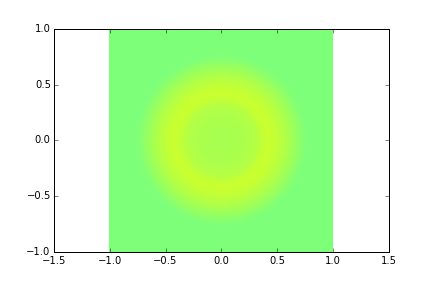
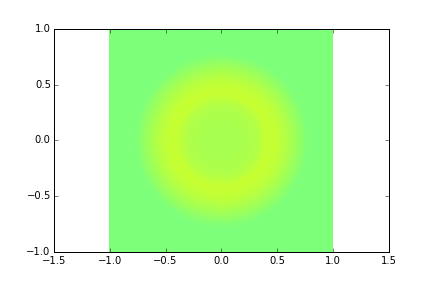
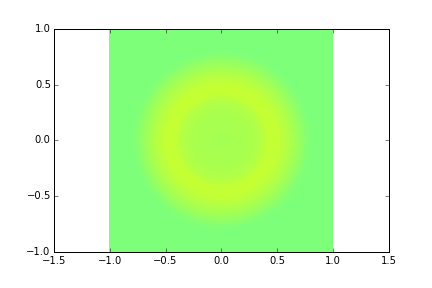
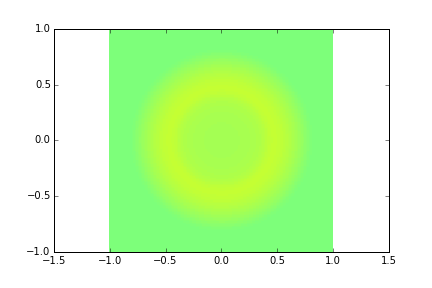
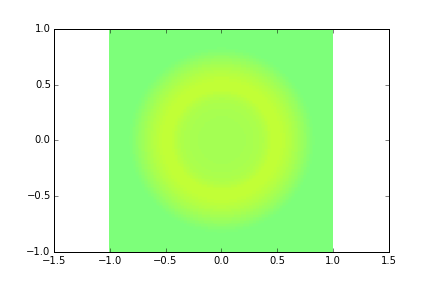
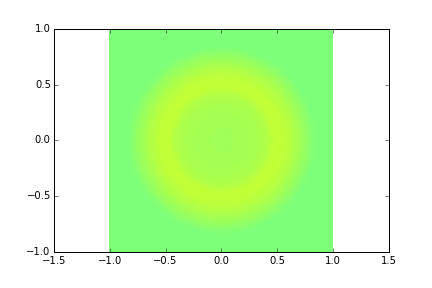
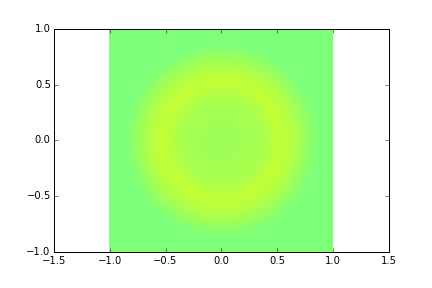
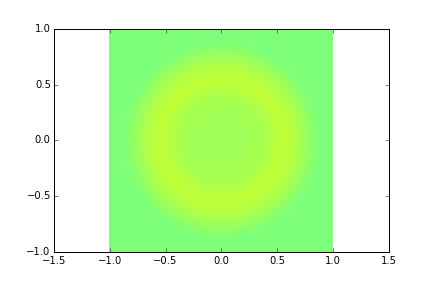
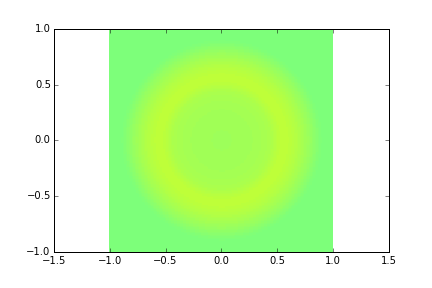
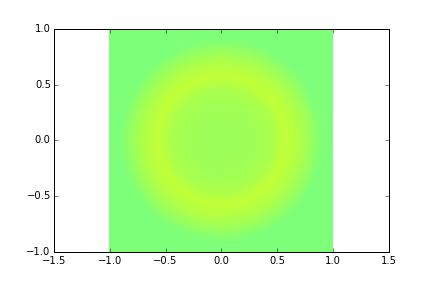
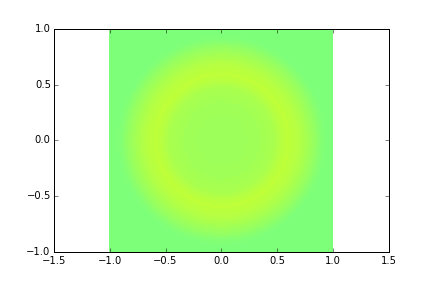
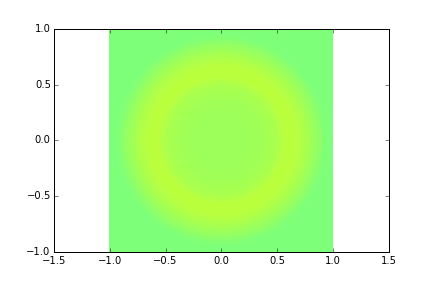
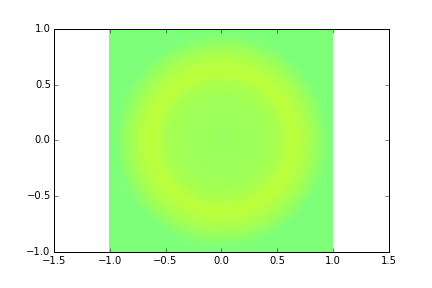
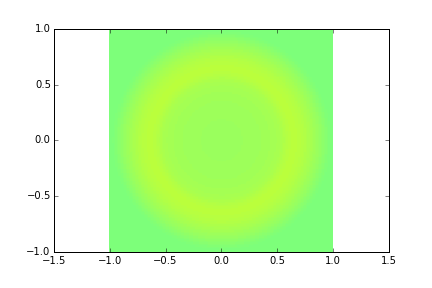
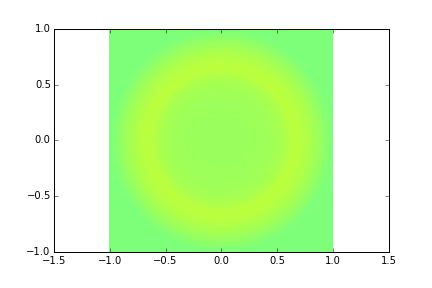
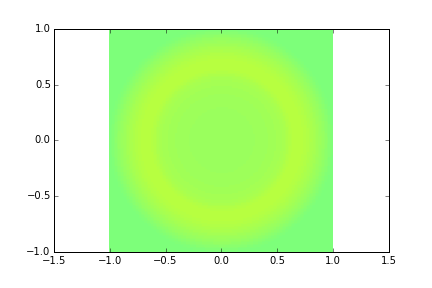
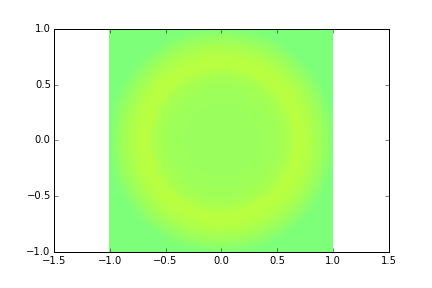
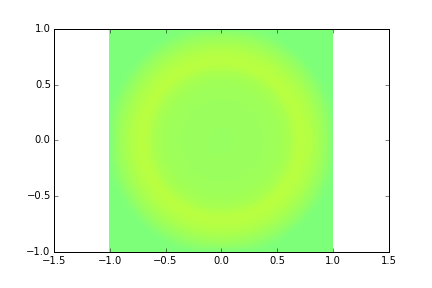
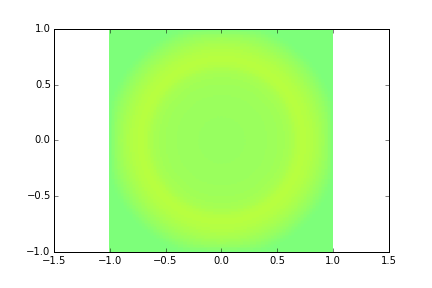
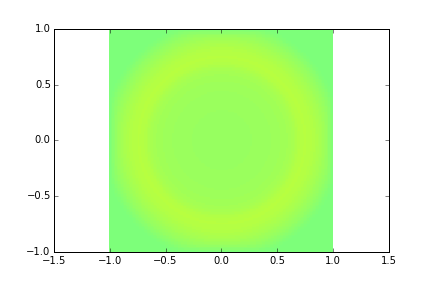
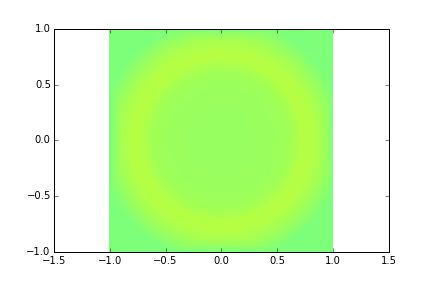
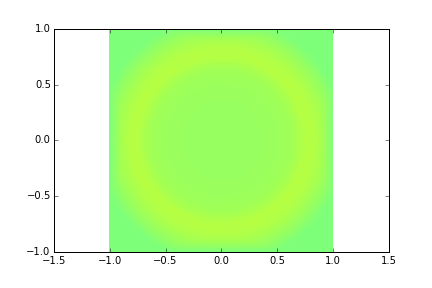
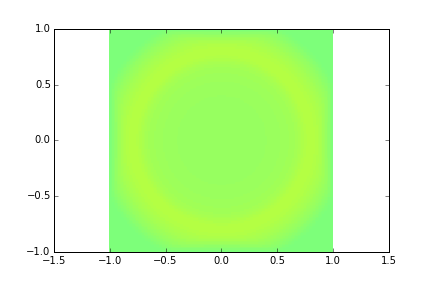
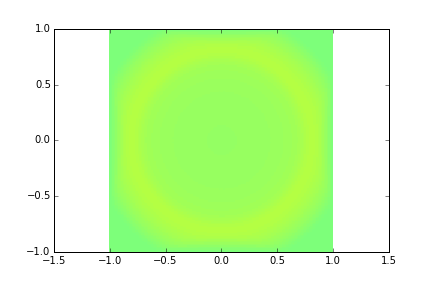
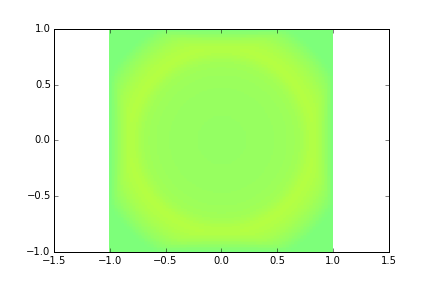
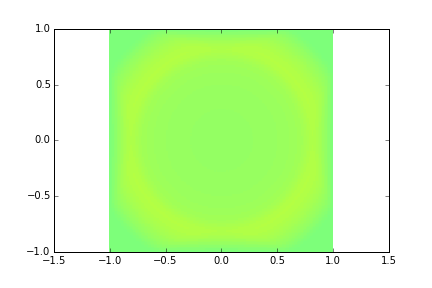
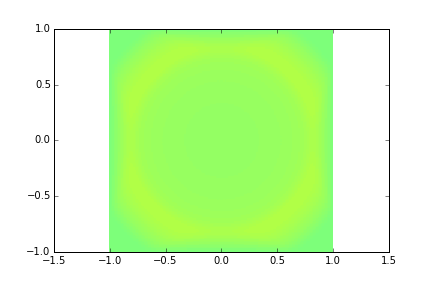
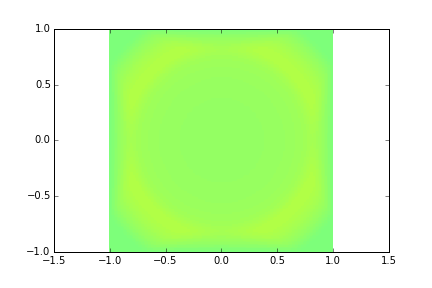
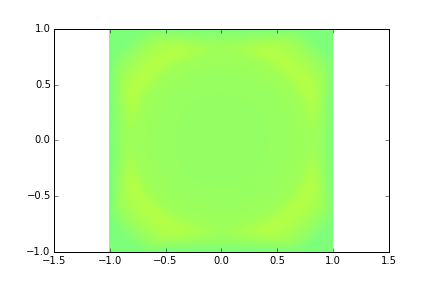
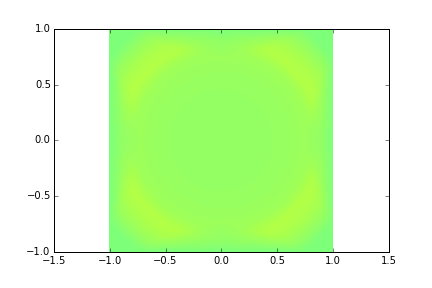
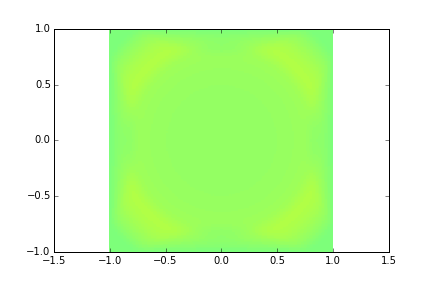
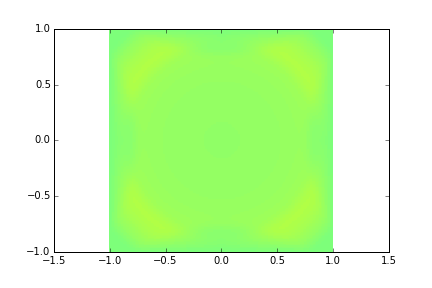
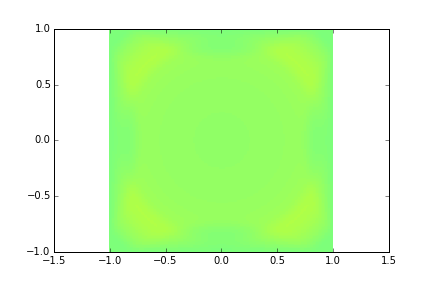
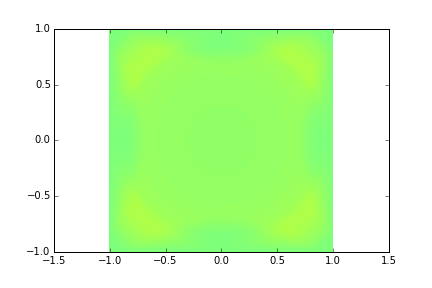
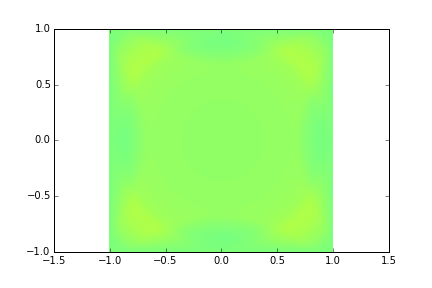
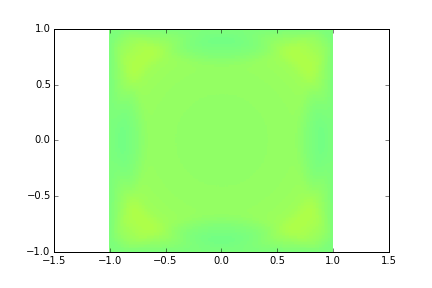
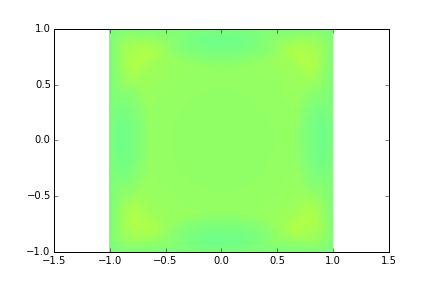
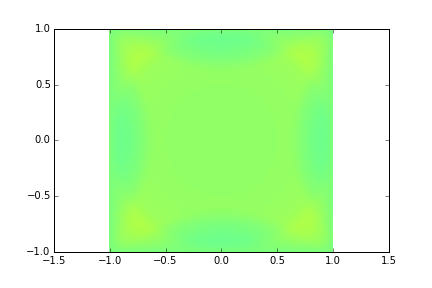
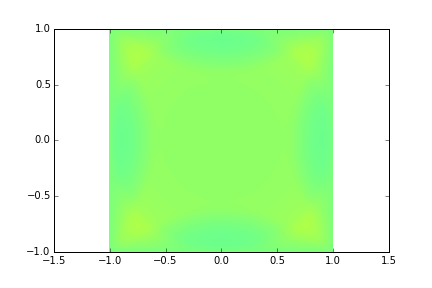
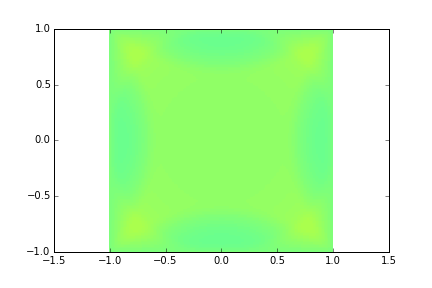
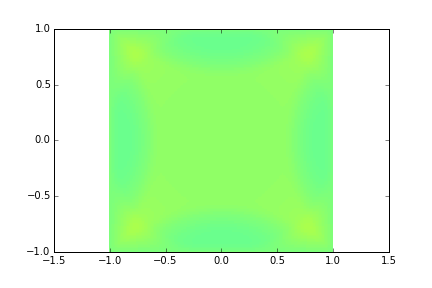
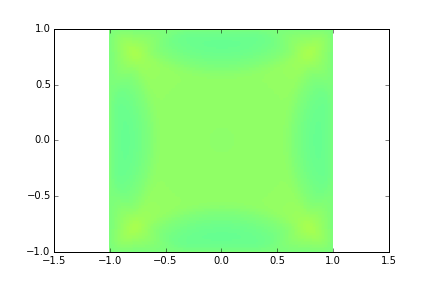
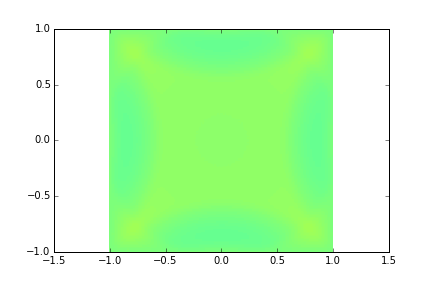
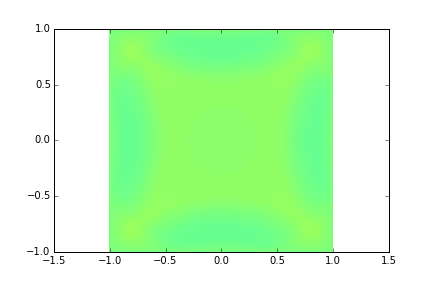
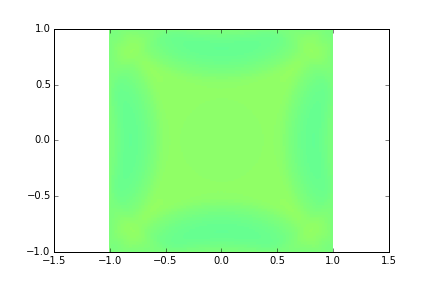
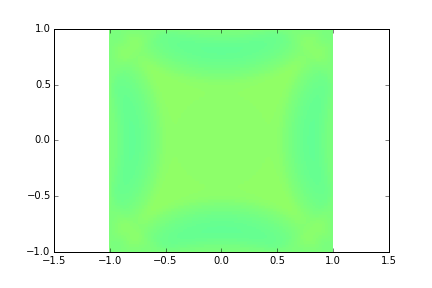
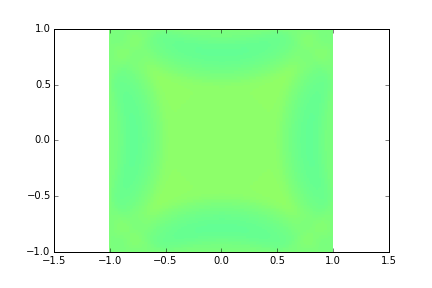
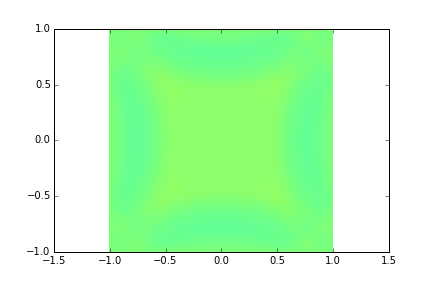
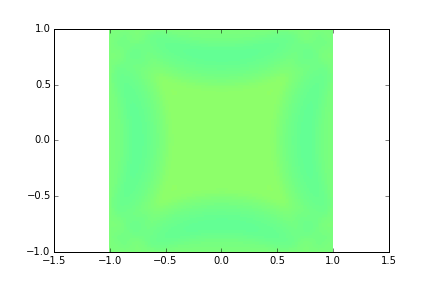
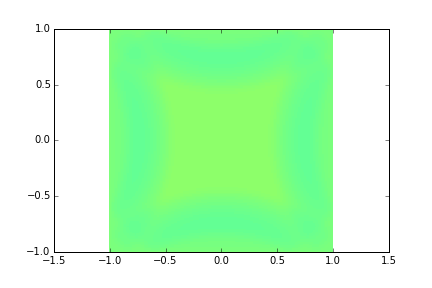
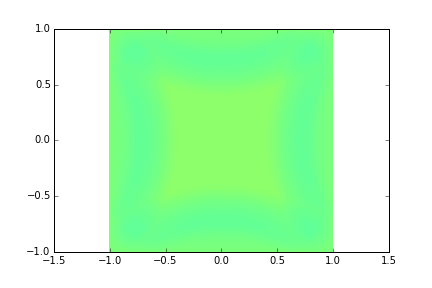
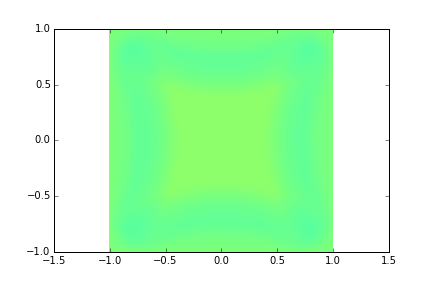
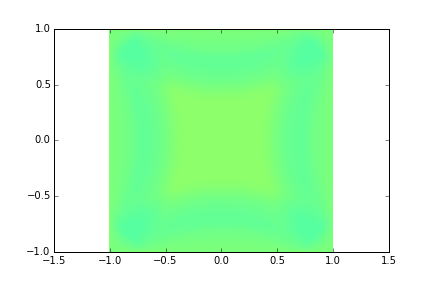
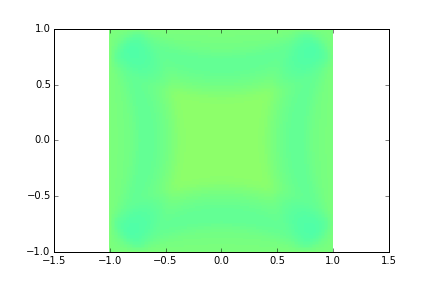
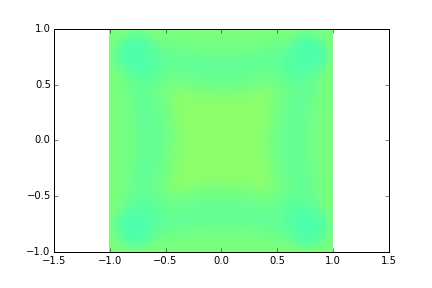
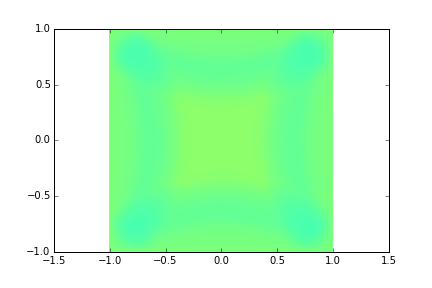
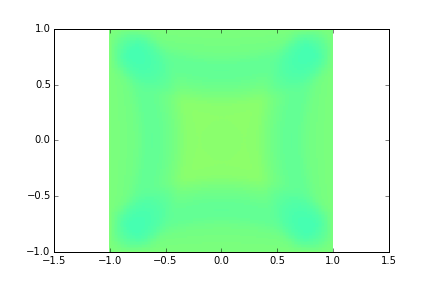
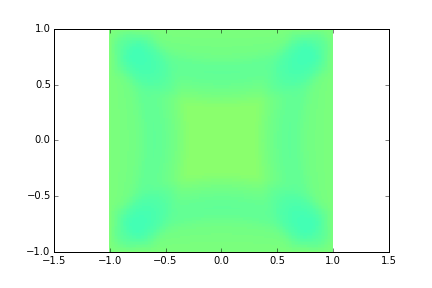
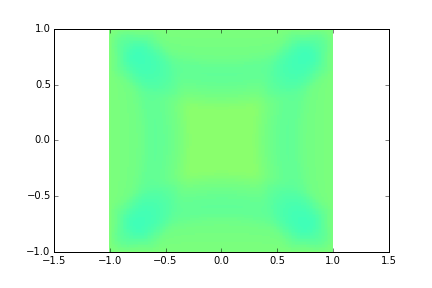
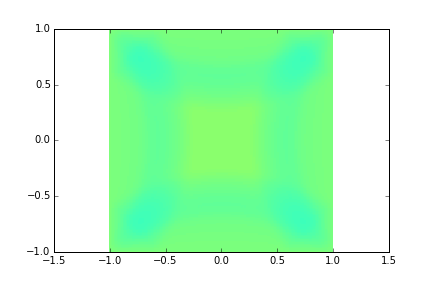
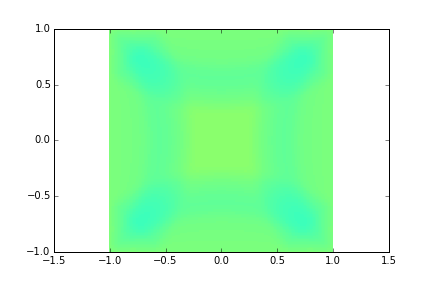
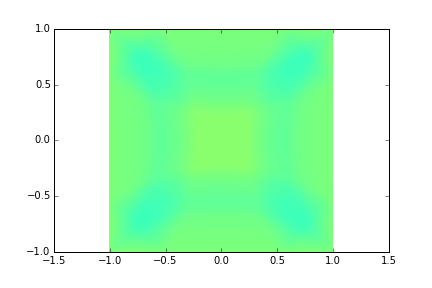
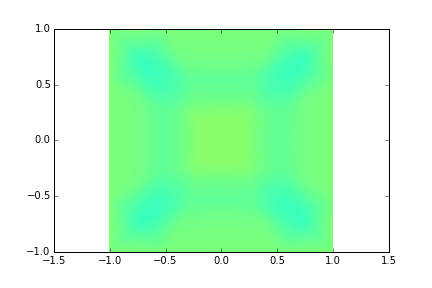
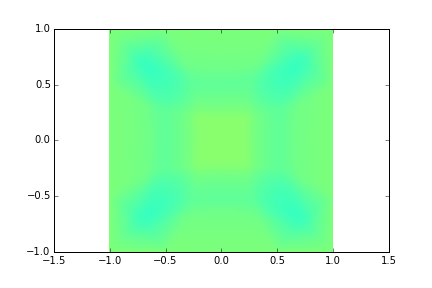

In [62]:
from matplotlib import animation
from JSAnimation import IPython_display


fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(-1,1))
pc = ax.pcolormesh(x,y,u[0,:,:],vmin=-10.,vmax = 10.)
plt.axis('equal')

def animate(i):
    pc.set_array(u[i*10,:-1,:-1].ravel())
    return pc

animation.FuncAnimation(fig, animate, frames=100, interval=30)

In [57]:
u.max()

13.288179653456936